# CREATE PERUVIAN SIGN LANGUAGE DATASET

In [15]:
!python3 -m pip freeze | wc -l

108


In [2]:
from platform import python_version

print(python_version())

3.8.11


In [3]:
import pandas
print('pandas: {}'.format(pandas.__version__))

pandas: 1.4.0


In [4]:
%cd /home/shuaman/repucs/PSL-GAN
%load_ext autoreload
%autoreload 2

/home/shuaman/repucs/PSL-GAN


In [5]:
import missingno as msno
from utils.utils_getdata import *

In [6]:
from create_dataset import *

In [7]:
set_seed(12345)

In [8]:
input_path = "/data/shuaman/psl_gan/Data/Videos/SEGMENTED_SIGN/"
output_path = "/data/shuaman/psl_gan/Data/structured_data/"
lefthand_lm = True
righthand_lm = True
min_frames = 10
min_instances = 10
use_extra_joint = False
porc_frame_completion = 0
raw_dataset = "/data/shuaman/psl_gan/Data/structured_data/raw_data_mediapipe.json"
raw_coco_dataset = "/data/shuaman/psl_gan/Data/structured_data/raw_data_cocopose.json"
n_landmarks = 27
use_coco = True

In [9]:
gds = GenerateDataset(input_path, output_path, lefthand_lm, righthand_lm, raw_dataset, raw_coco_dataset)

Holistic Model
Is Directory
['proteinas_porcentajes', 'ira_alegria']


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [63]:
#xd = gds.create_dataset(min_frames, min_instances, use_extra_joint, porc_frame_completion)

Loading raw data got by mediapipe from json file: /data/shuaman/psl_gan/Data/structured_data/raw_data_mediapipe.json
Reading coco raw dataset
df.shape=(3010125, 8)
df_cocopose.shape=(5337955, 8)

Original
Shape (4952601, 7) - N classes 506  - Number of videos 2673

Filter: list of landmarks
Shape (908279, 9) - N classes 506  - Number of videos 2673

Filter: frames that have all landmarks
Shape (693873, 9) - N classes 488  - Number of videos 2398

Filter: videos which all frames have those landmarks
Shape (257607, 9) - N classes 232  - Number of videos 711


/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fc["n_frame_to_complete"] = min_frames - df_fc["n_frames"]
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fc["lower_value"] = df_fc.apply(lambda x: 0 + math.floor(x["n_frame_to_complete"]/2), axis=1)
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T


Filter: fill missing frames to reach the minimum
Shape (260091, 10) - N classes 232  - Number of videos 711

Filter: min number of frames
Shape (239193, 10) - N classes 213  - Number of videos 557


/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd_valid['row_number_video'] = xd_valid.groupby(['videoname'])['n_frame'].cumcount() + 1
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd_valid['upper_value'] = xd_valid.apply(lambda x: math.floor((x['n_frames'] - (min_frames - x['missing_frames']))/2)
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:155: SettingWithCopyWarning: 
A value is trying


Filter: 10 frames for each video
Shape (150390, 11) - N classes 213  - Number of videos 557

Filter: classes of at least 12 instances
Shape (24030, 12) - N classes 5  - Number of videos 89

Filter: subsampling 12 instances frames for each video
Shape (16200, 13) - N classes 5  - Number of videos 60
Saving data in data_extraframes_10_12_27.pk file


## Step 1: Getting data from mediapipe and cocopose

In [10]:
data = gds.get_mediapipe_data()

Loading raw data got by mediapipe from json file: /data/shuaman/psl_gan/Data/structured_data/raw_data_mediapipe.json


In [11]:
LIST_LANDMARKS = LIST_LANDMARKS_dict[str(n_landmarks)]
LIST_LHAND_MEDIAPIPE = LIST_LHAND_MEDIAPIPE_dict[str(n_landmarks)]
LIST_RHAND_MEDIAPIPE = LIST_RHAND_MEDIAPIPE_dict[str(n_landmarks)]
LIST_LANDMARKS_COCO = LIST_LANDMARKS_COCO_dict[str(n_landmarks)]

max_landmark = max(data["n_landmark"])

list_landmarks_mp = LIST_LANDMARKS + [i + N_POSE_LANDMARKS for i in LIST_LHAND_MEDIAPIPE]
list_landmarks_mp = list_landmarks_mp + [i + N_POSE_LANDMARKS + N_LHAND_LANDMARKS for i in LIST_RHAND_MEDIAPIPE]
list_landmarks_coco_converted = [i + max_landmark + 1 for i in LIST_LANDMARKS_COCO]
list_landmarks_total = list_landmarks_mp + list_landmarks_coco_converted

In [12]:
len(list_landmarks_mp)

27

In [13]:
len(list_landmarks_total)

54

In [14]:
list_landmarks_mp

[0,
 2,
 5,
 11,
 12,
 13,
 14,
 15,
 16,
 21,
 22,
 38,
 41,
 42,
 45,
 46,
 49,
 50,
 53,
 59,
 62,
 63,
 66,
 67,
 70,
 71,
 74]

In [17]:
dict_data_coco = gds.get_coco_data(max_landmark)

Reading coco raw dataset
/data/shuaman/psl_gan/Data/structured_data/raw_data_cocopose.json


## Step 2: Filtering incorrect data from mediapipe and cocopose

In [18]:
df, df_or_mediapipe = get_df_mediapipe(data, WIDTH, HEIGHT)

df.shape=(2593275, 8)
df.videoname.nunique()=2311


In [15]:
df.shape

(2593275, 8)

In [19]:
df_or_mediapipe.shape

(1991897, 8)

In [20]:
df_cocopose, df_or_cocopose = get_df_cocopose(dict_data_coco)

df_cocopose.shape=(4598741, 8)
df_cocopose.videoname.nunique()=2311


In [22]:
df_cocopose.shape

(4598741, 8)

In [21]:
df_or_cocopose.shape

(3609088, 8)

In [23]:
df_cocopose.head(1)

,videoname,n_frame,n_landmark,x,y,outlier?,class,number
0,q-u-i-n-u-a_2160,0,75,0.496094,0.222656,False,q-u-i-n-u-a,2160


In [24]:
df.head(1)

,videoname,n_frame,n_landmark,x,y,class,number,out_range?
0,yo_901,0,0,0.500406,0.211298,yo,901,False


In [25]:
df[-df.videoname.isin(df_cocopose.videoname.unique())].videoname.unique()

array([], dtype=object)

In [26]:
df_cocopose[-df_cocopose.videoname.isin(df.videoname.unique())].videoname.unique()

array([], dtype=object)

In [27]:
aa = (df.groupby(["videoname"]).n_frame.nunique() - df_cocopose.groupby(["videoname"]).n_frame.nunique()).reset_index()
print(aa[aa.n_frame!=0].shape)
aa[aa.n_frame!=0]

(0, 2)


,videoname,n_frame


## Step 3: Concatenating both dataframes mediapipe and cocopose

In [28]:
df_or = pd.concat([df_or_mediapipe[["videoname", "n_frame", "n_landmark",
                                "x", "y", "class", "number"]], 
                        df_or_cocopose[["videoname", "n_frame", "n_landmark",
                                    "x", "y", "class", "number"]]]).reset_index(drop=True)

In [29]:
df_or.head()

,videoname,n_frame,n_landmark,x,y,class,number
0,yo_901,0,0,0.500406,0.211298,yo,901
1,yo_901,0,1,0.529832,0.182324,yo,901
2,yo_901,0,2,0.545603,0.183920,yo,901
3,yo_901,0,3,0.558631,0.185859,yo,901
4,yo_901,0,4,0.477102,0.179939,yo,901


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [32]:
!pwd

/home/shuaman/repucs/PSL-GAN


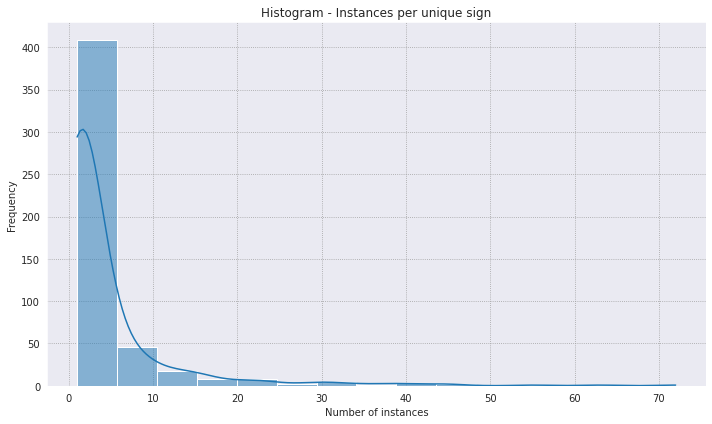

In [33]:
#plt.set(title='Histogram', xlabel='Height (cm)', ylabel='Count')

# sns.set_style("whitegrid")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
# sns.set_theme()
plt.figure(figsize=(10,6), tight_layout=True)
plt.title("Histogram - Instances per unique sign")
plt.xlabel("Number of instances")
plt.ylabel("Frequency")
sns.histplot(data=df_or.groupby(["class"]).videoname.nunique().reset_index(), x="videoname", kde=True, bins=15,
                )
plt.savefig("histogram_ninstances.png")
plt.show()


In [34]:
print()
print("Original")
print(f"Shape {df_or.shape} - N classes", df_or["class"].nunique(), 
    " - Number of videos", df_or["videoname"].nunique())



Original
Shape (5600985, 7) - N classes 505  - Number of videos 2287


## Step 4: Filtering landamarks

In [35]:
df_or, df_flag_lm_orig, df_flag_lm, df_flag_lm_v = filter_landmarks(df_or, list_landmarks_mp, list_landmarks_coco_converted, use_coco)


Use coco True

Filter: list of landmarks
Shape (876014, 9) - N classes 505  - Number of videos 2287

Filter: frames that have all landmarks
Shape (802359, 9) - N classes 495  - Number of videos 2129

Filter: videos which all frames have those landmarks
Shape (540486, 9) - N classes 378  - Number of videos 1415


In [36]:
assert df_or.groupby(["videoname", "n_frame"]).n_landmark.nunique().nunique()==1 and df_or.groupby(["videoname", "n_frame"]).n_landmark.nunique().unique()[0]==len(list_landmarks_mp) , "Frames dont have the same number of landmarks"

### Landmarks got by mediapipe model: 27 points

In [49]:
len(list_landmarks_mp)

27

<AxesSubplot:>

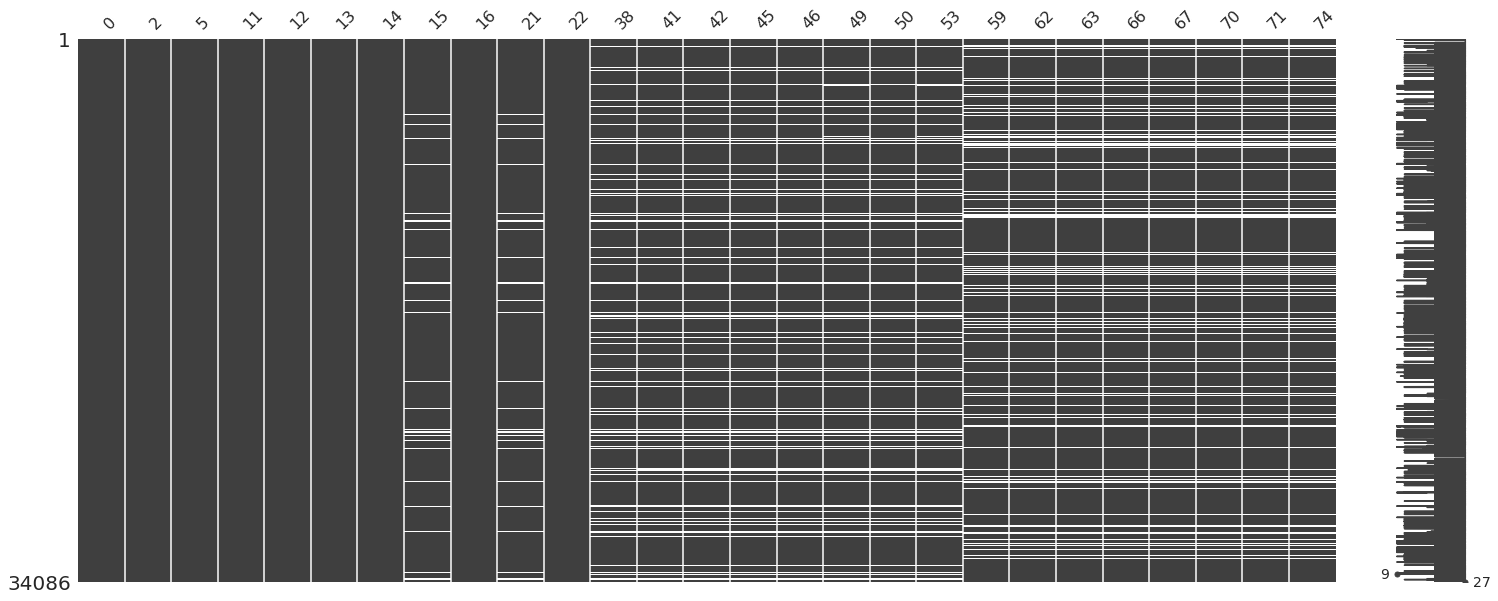

In [43]:
msno.matrix(df_flag_lm_orig[list_landmarks_mp])

<AxesSubplot:xlabel='n_landmark'>

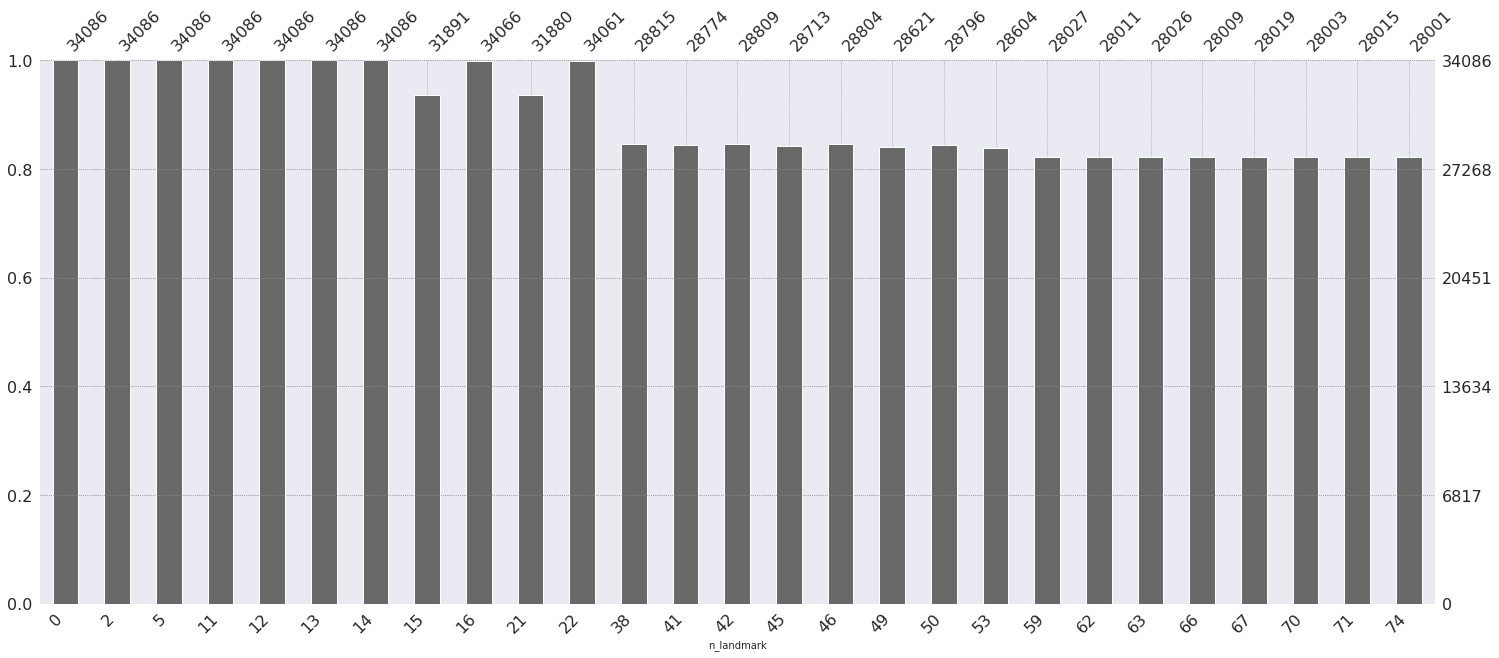

In [53]:
msno.bar(df_flag_lm_orig[list_landmarks_mp])

### Landmarks got by cocopose model: 27 points

In [50]:
len(list_landmarks_coco_converted)

27

<AxesSubplot:>

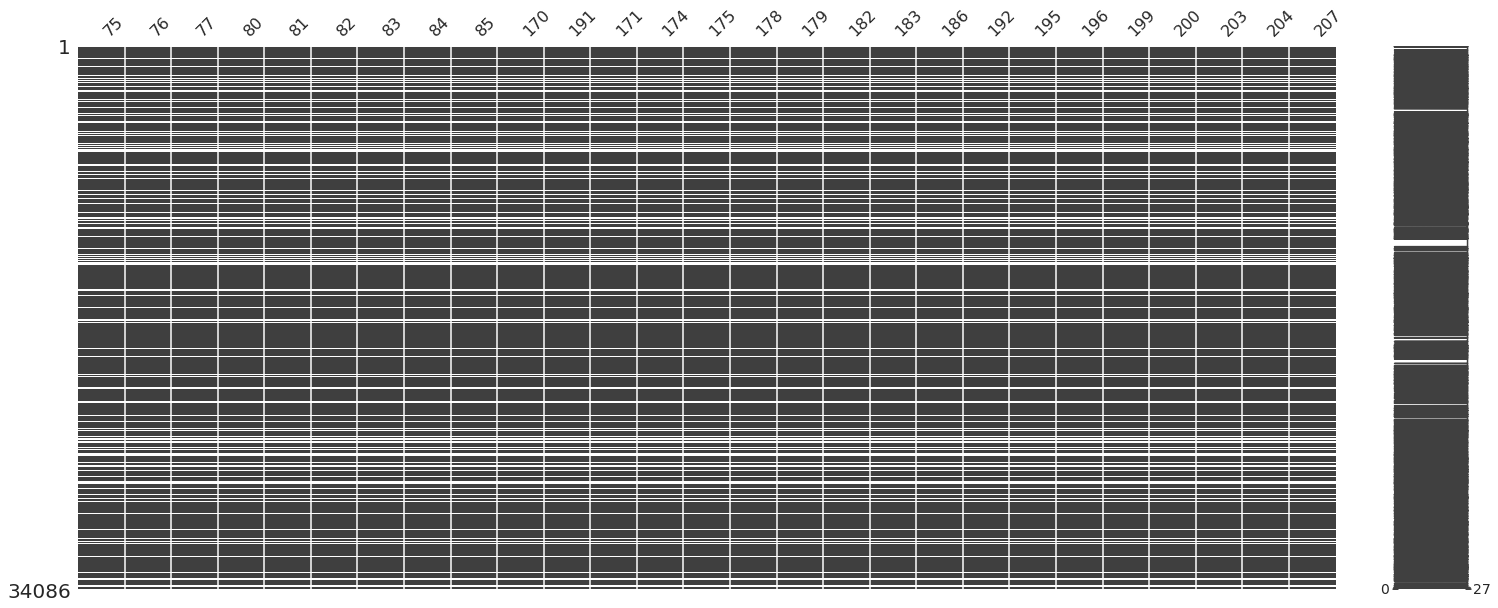

In [51]:
msno.matrix(df_flag_lm_orig[list_landmarks_coco_converted])

<AxesSubplot:xlabel='n_landmark'>

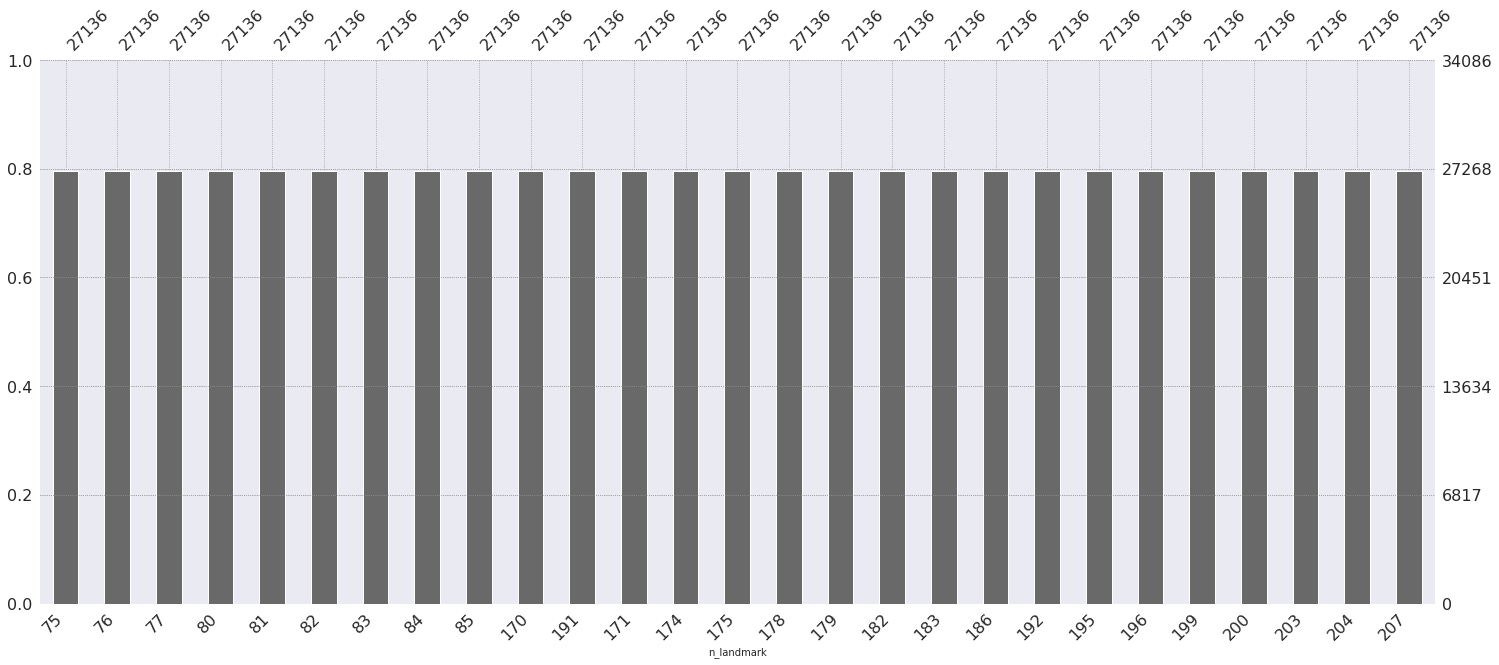

In [54]:
msno.bar(df_flag_lm_orig[list_landmarks_coco_converted])

### Landmarks combining both models: 27 points

<AxesSubplot:>

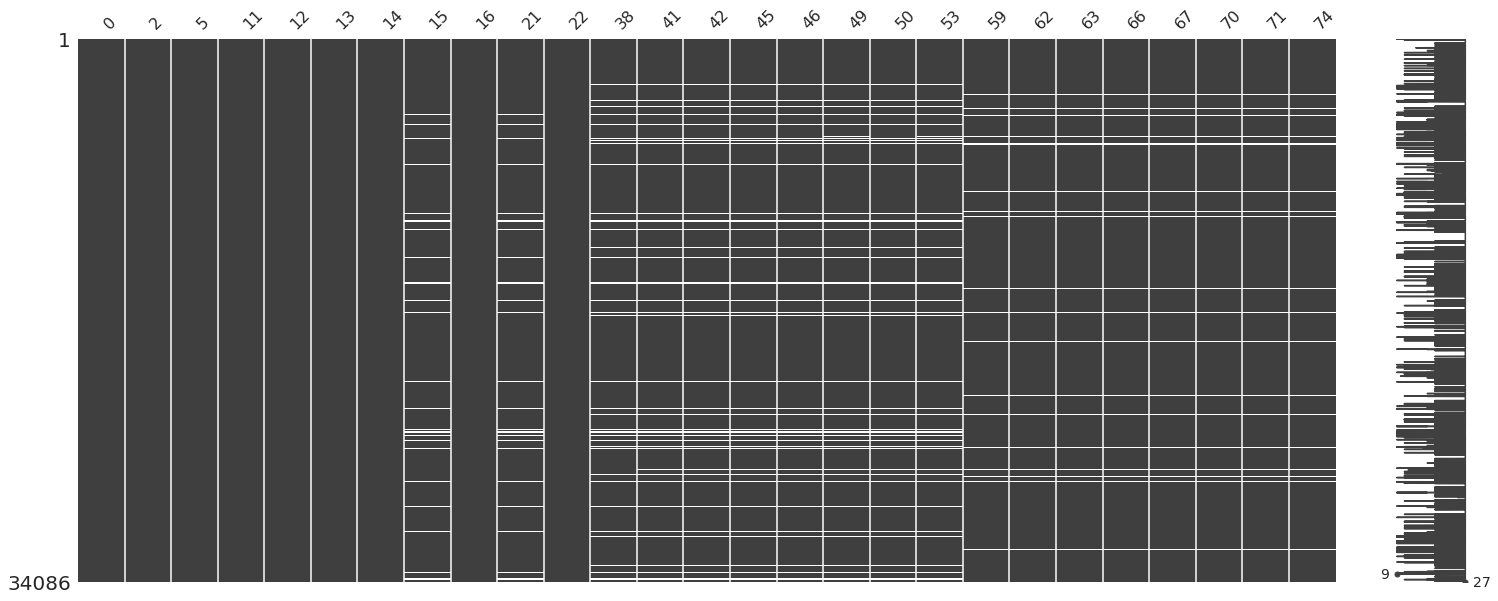

In [52]:
msno.matrix(df_flag_lm[list_landmarks_mp])

<AxesSubplot:xlabel='n_landmark'>

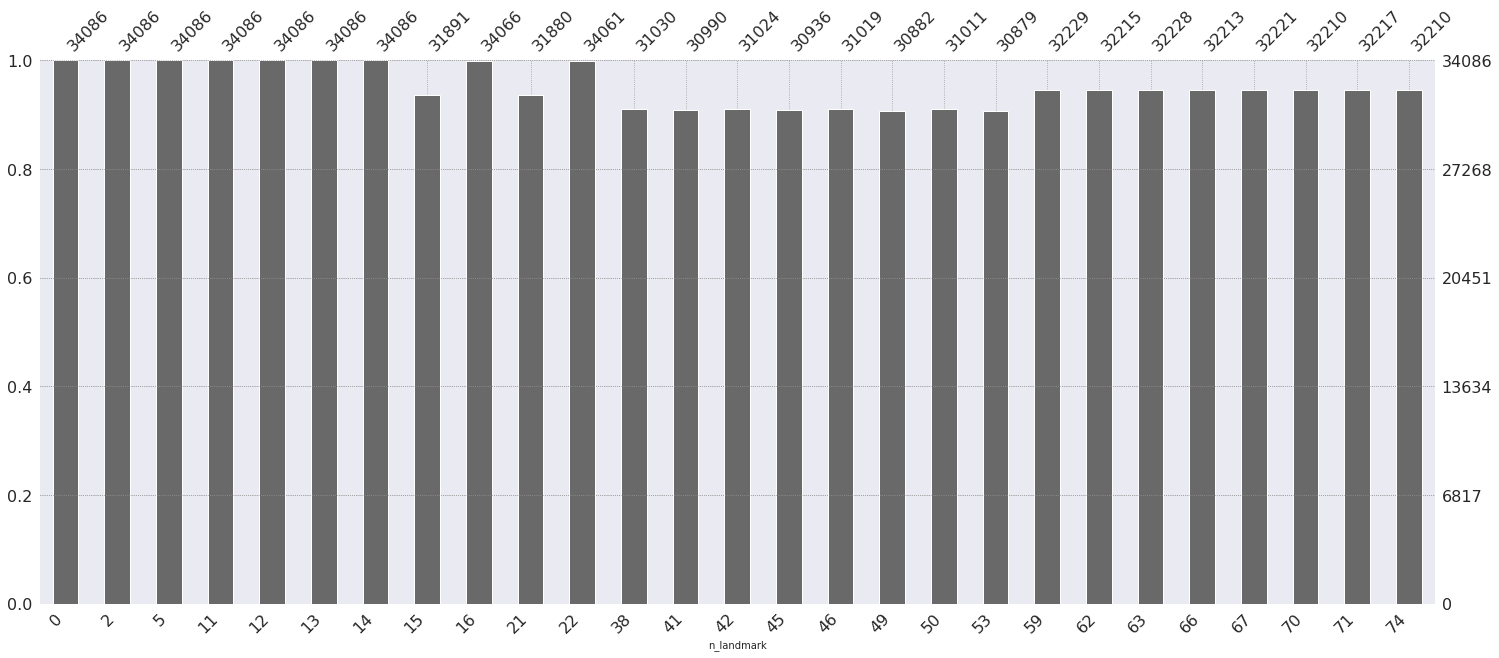

In [55]:
msno.bar(df_flag_lm[list_landmarks_mp])

In [69]:
df_notna_lm = pd.concat([df_flag_lm_orig[list_landmarks_mp].notna().sum(), df_flag_lm[list_landmarks_mp].notna().sum()], axis=1).rename(columns={0: "MediaPipe Landmarks",
                                                                                                                                  1: "MediaPipe and CocoPose Landmarks"})

In [135]:
df_notna_lm.head(1)

,MediaPipe Landmarks,MediaPipe and CocoPose Landmarks
n_landmark,,
0,34086,34086


In [83]:
my_range=range(1,len(df_notna_lm.index)+1)

Text(0, 0.5, 'Landmark')

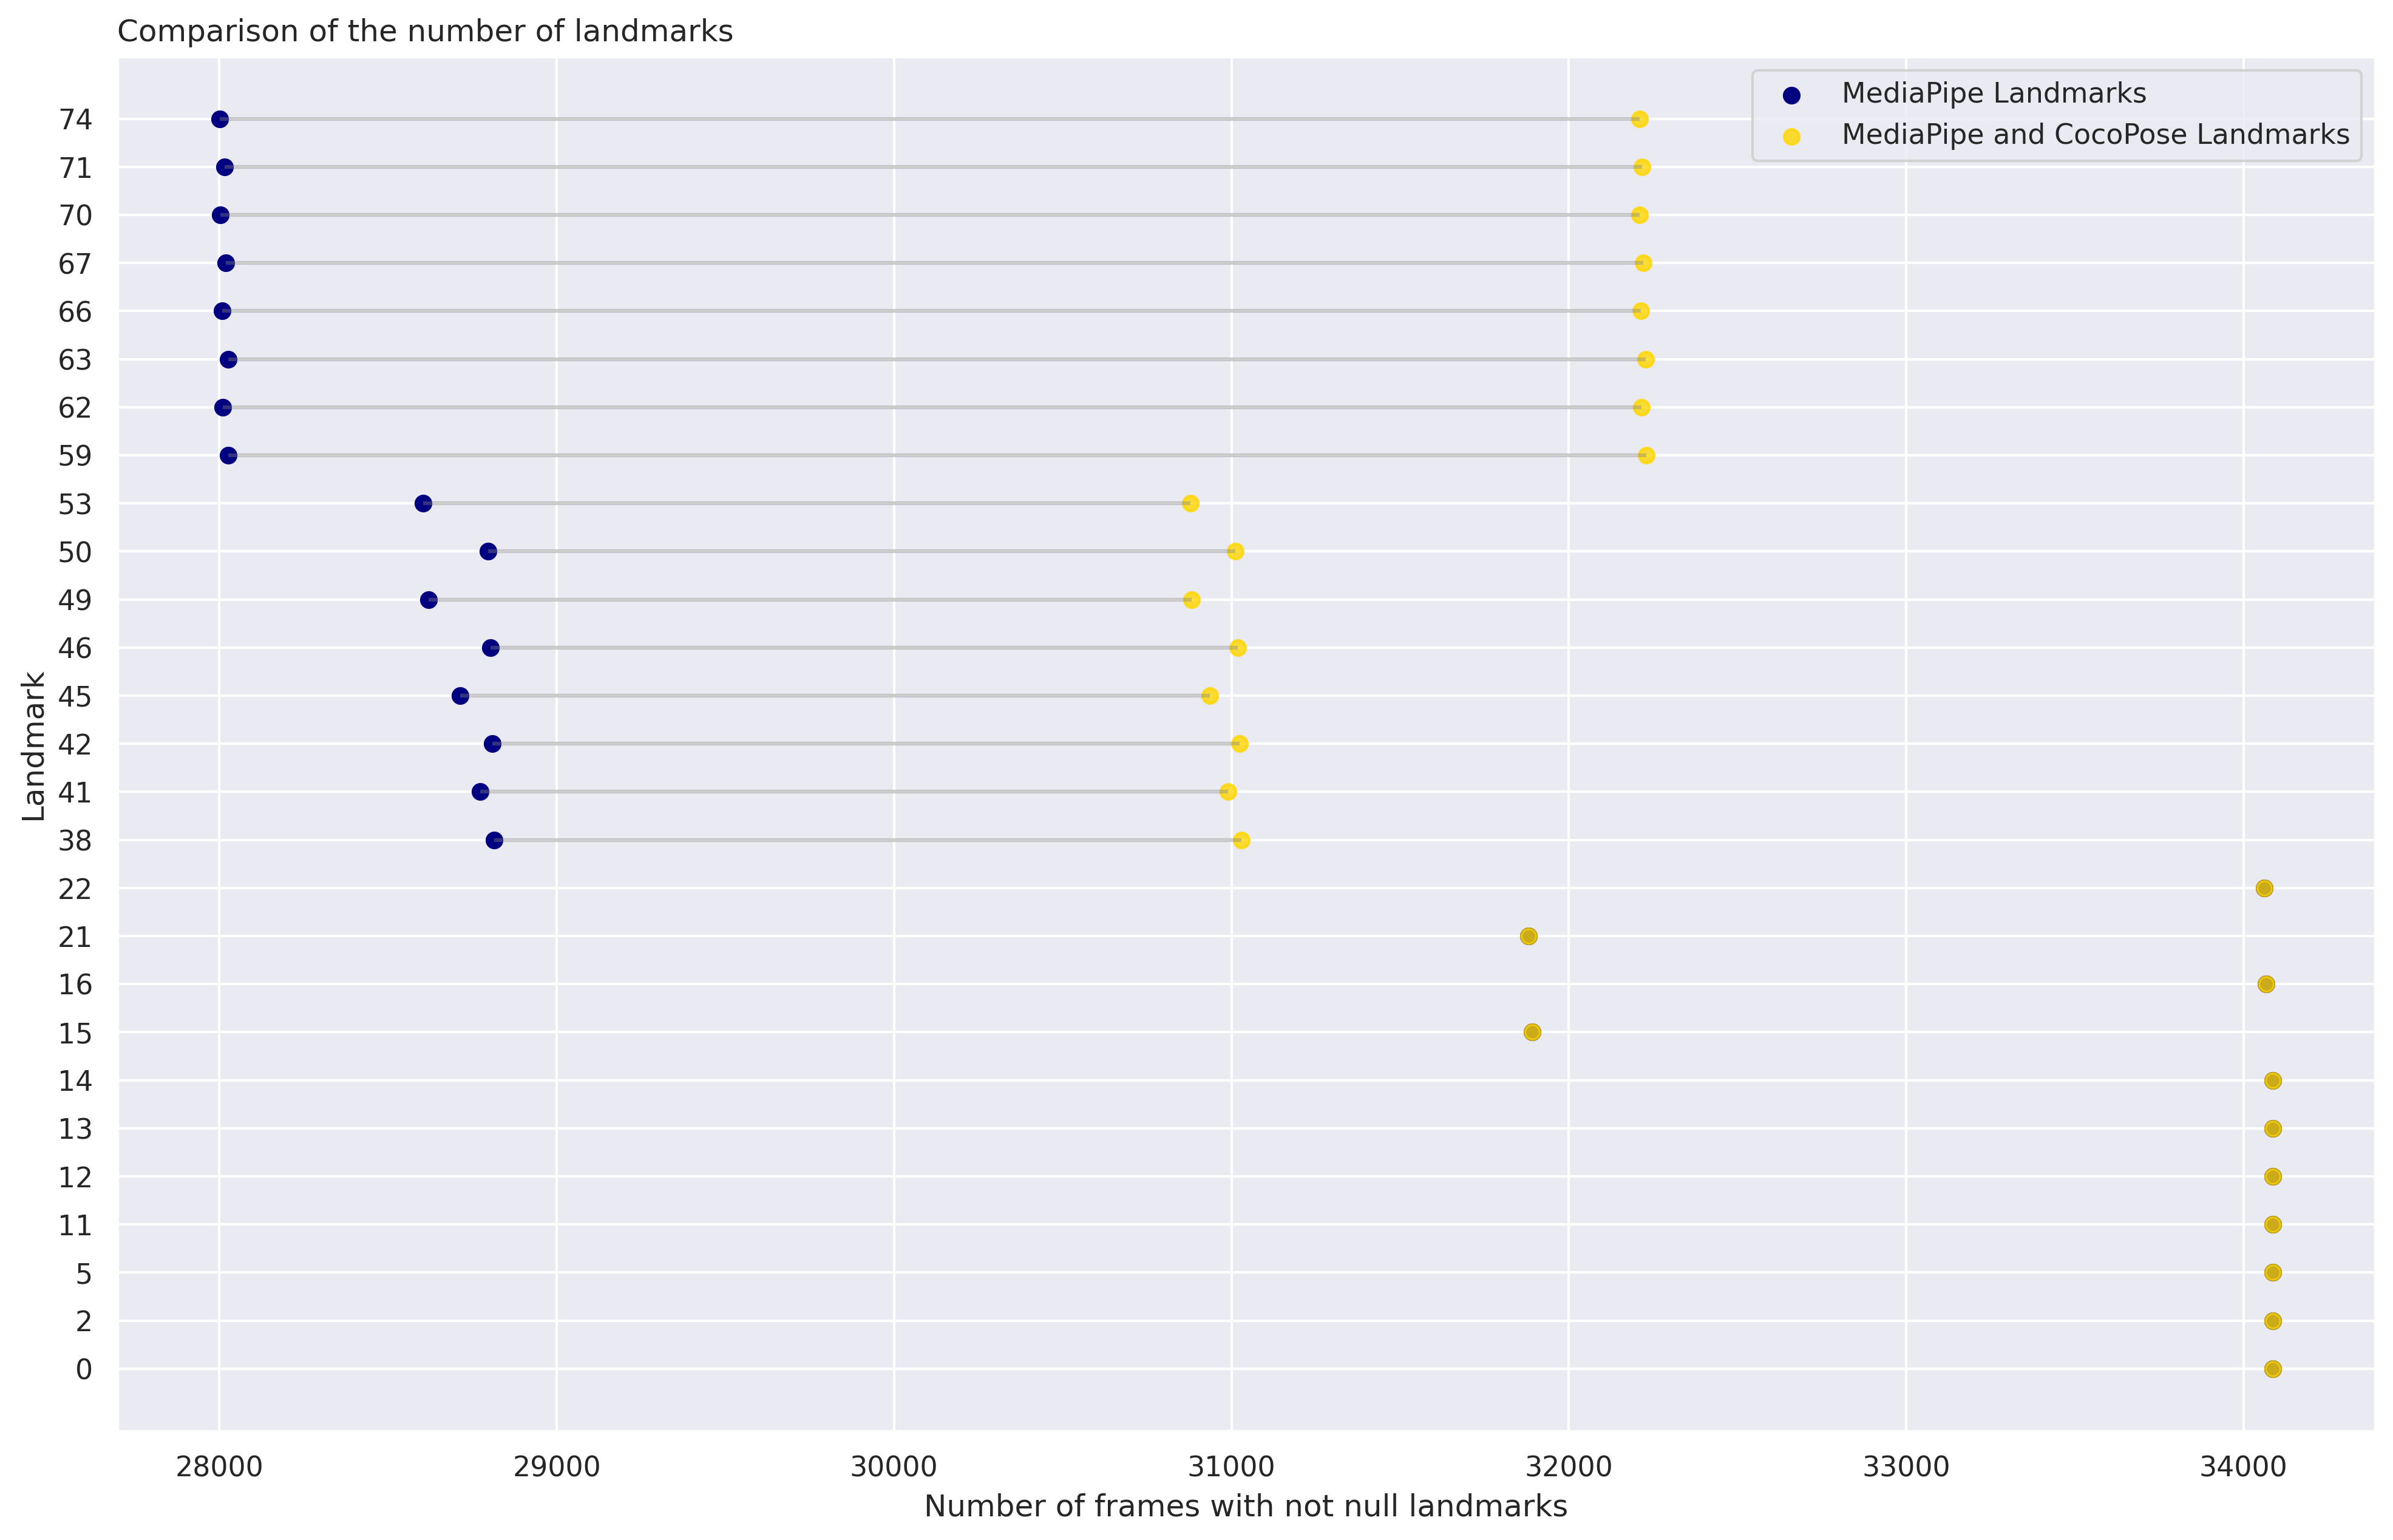

In [99]:
fig = plt.figure(figsize=(16,10), dpi=300)
plt.hlines(y=my_range, xmin=df_notna_lm['MediaPipe Landmarks'], xmax=df_notna_lm['MediaPipe and CocoPose Landmarks'], color='grey', alpha=0.4)
plt.scatter(df_notna_lm['MediaPipe Landmarks'], my_range, color='navy', alpha=1, label='MediaPipe Landmarks')
plt.scatter(df_notna_lm['MediaPipe and CocoPose Landmarks'], my_range, color='gold', alpha=0.8 , label='MediaPipe and CocoPose Landmarks')
plt.legend()

# Add title and axis names
plt.yticks(my_range, df_notna_lm.index)
plt.title("Comparison of the number of landmarks", loc='left')
plt.xlabel('Number of frames with not null landmarks')
plt.ylabel('Landmark')

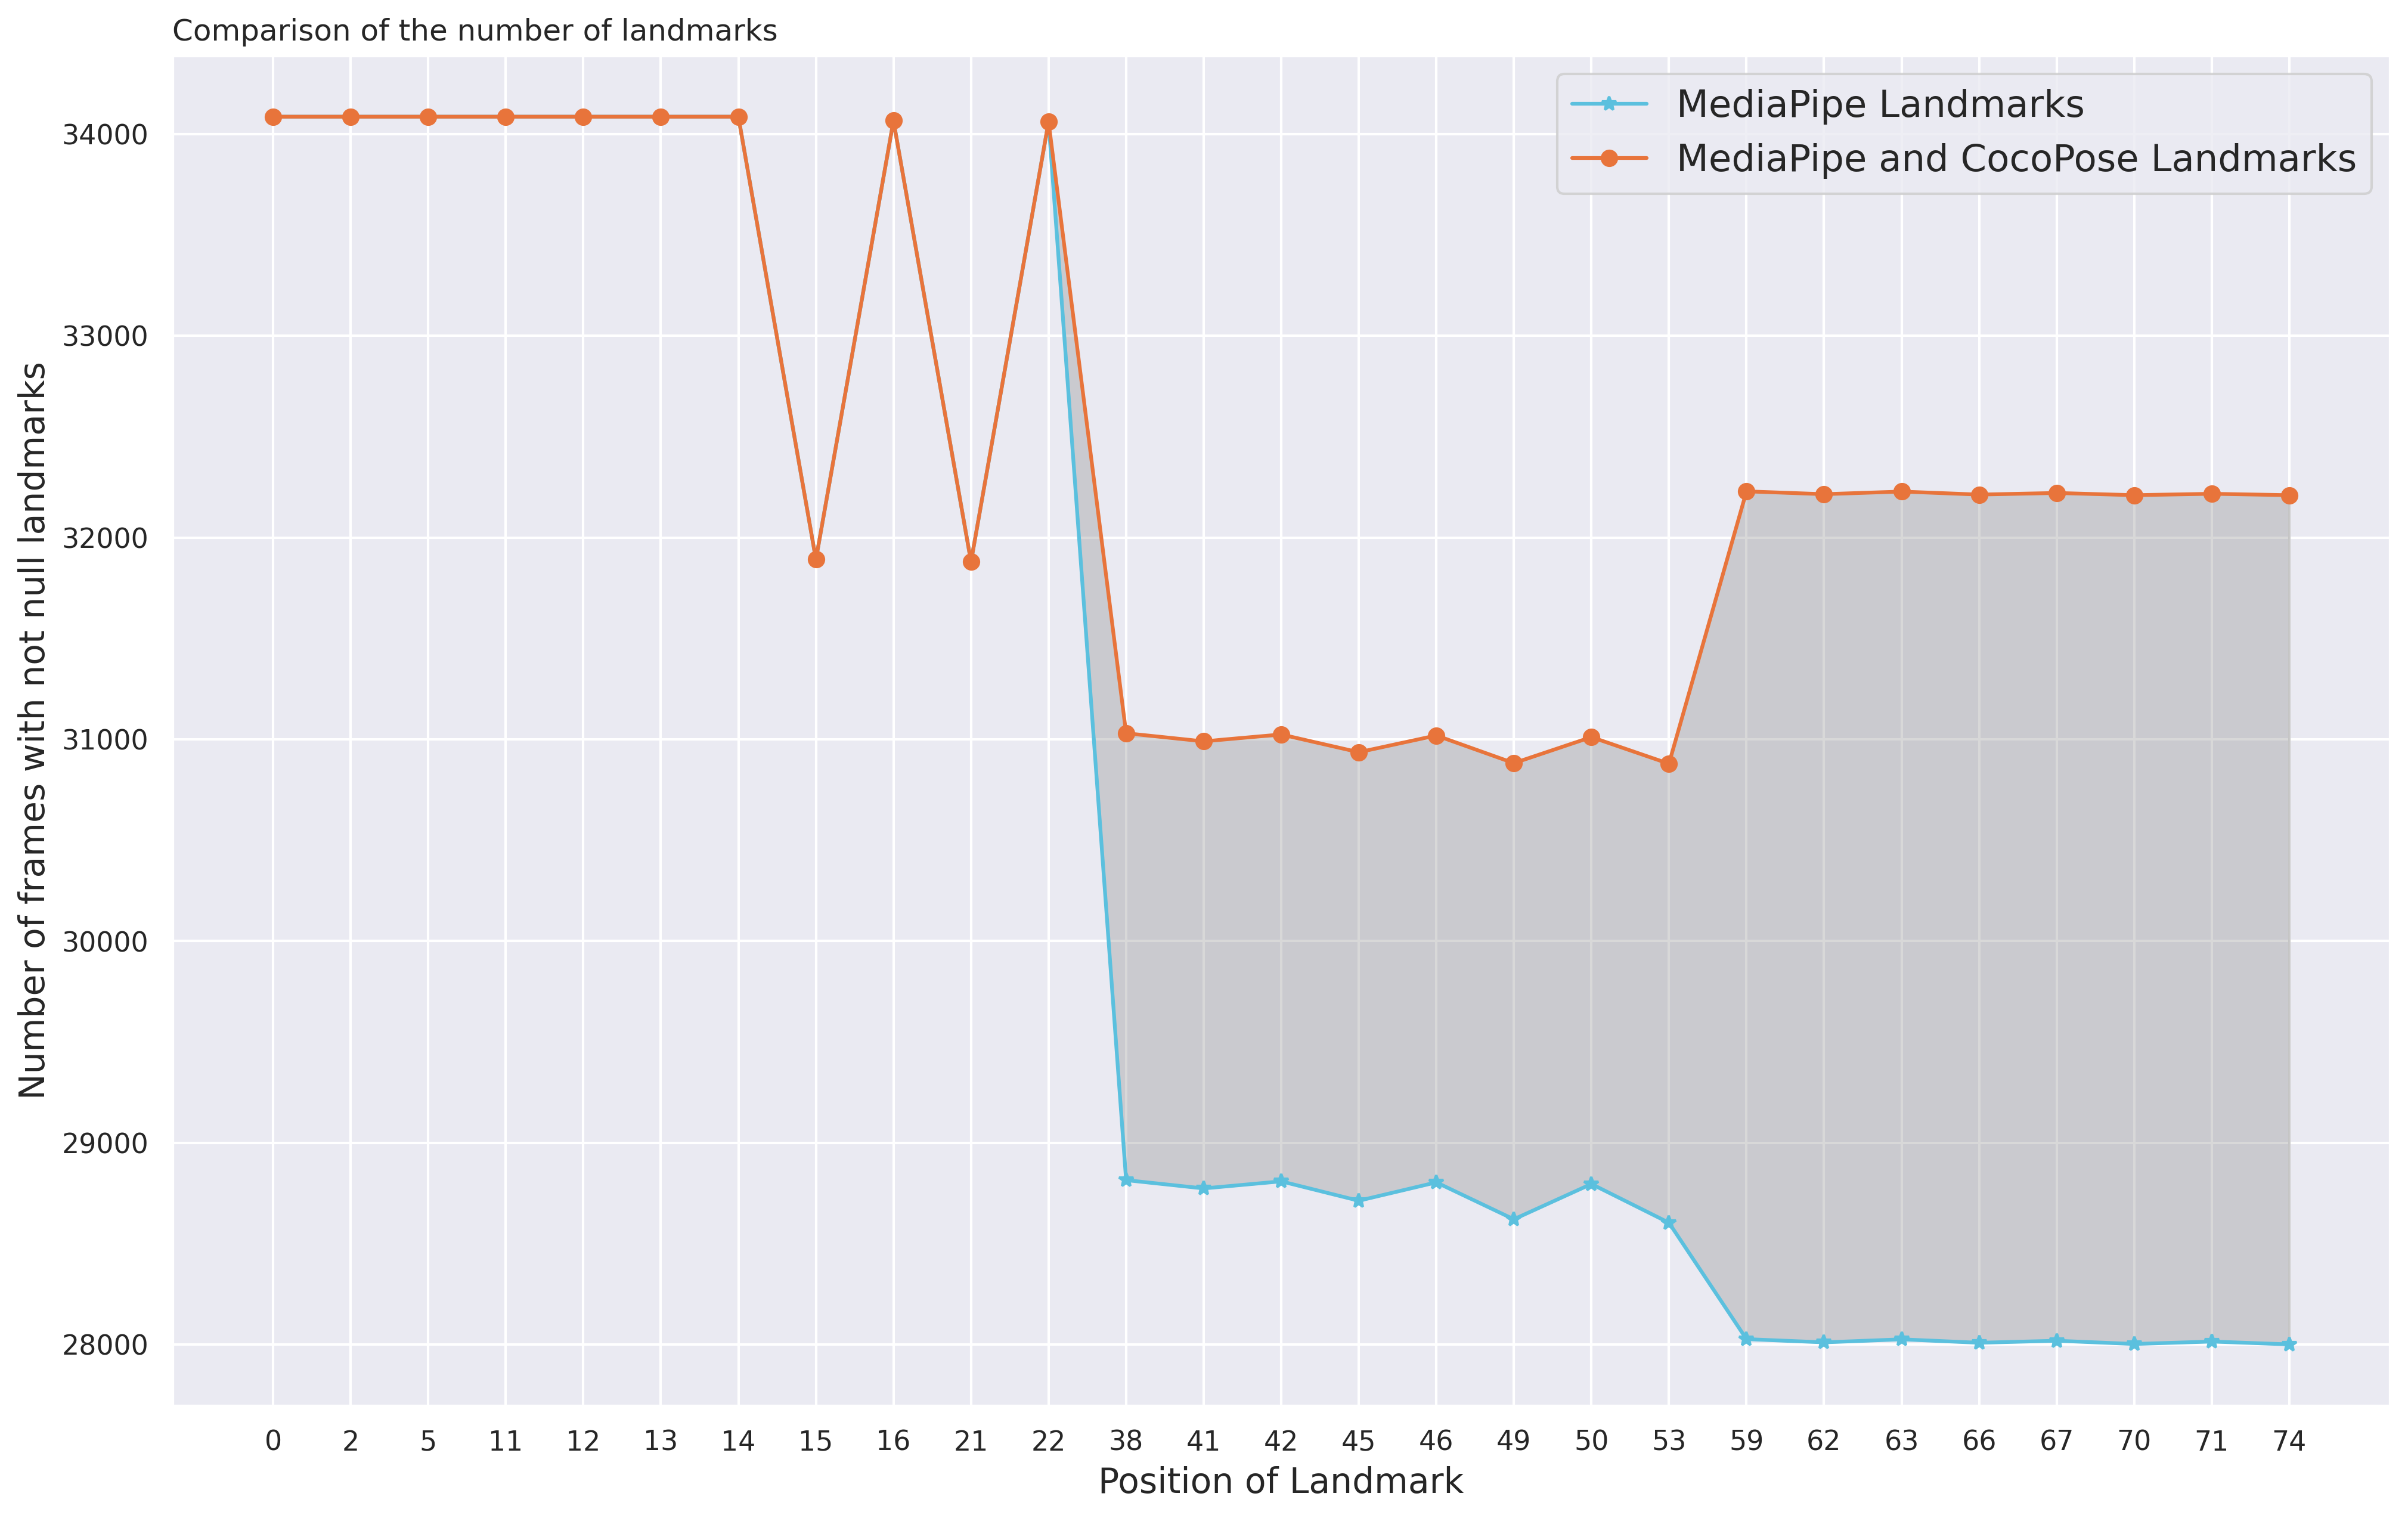

In [134]:
fig = plt.figure(figsize=(16,10), dpi=300)
plt.plot(my_range, df_notna_lm['MediaPipe Landmarks'], 
             label="MediaPipe Landmarks", marker="*", color="#5bc0de")
plt.plot(my_range, df_notna_lm['MediaPipe and CocoPose Landmarks'], 
         label="MediaPipe and CocoPose Landmarks", marker="o", color="#E8743B")
plt.fill_between(my_range, df_notna_lm['MediaPipe Landmarks'], df_notna_lm['MediaPipe and CocoPose Landmarks'], color="grey", alpha=0.3)
#plt.legend()
#plt.xticks(df_notna_lm.index.tolist(), size=13)
plt.xticks(my_range, df_notna_lm.index.tolist())
plt.title("Comparison of the number of landmarks", loc='left')
plt.xlabel("Position of Landmark", fontsize=14)
plt.ylabel("Number of frames with not null landmarks", fontsize=14)
plt.legend(fontsize=15)
plt.show()

- Cocopose recognize better the hand landmarks since points starting in 38 are from hands

## Step 5: Getting number of frames

In [136]:
df_or_nframes = df_or.groupby("videoname").agg({"n_frame": "nunique"}).rename(columns={"n_frame": "n_frames"})
df_or = df_or.join(df_or_nframes, on="videoname")

## Step 6: Frame completion

In [137]:
porc_frame_completion

0

In [138]:
if porc_frame_completion>0:
    df_or = frame_completion(df_or, min_frames, porc_frame_completion)

## Step 7: Filter exactly n frames

In [139]:
df_or = filter_n_frames(df_or, min_frames)


Filter: min number of frames
Shape (476334, 10) - N classes 353  - Number of videos 1046


/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd_valid['row_number_video'] = xd_valid.groupby(['videoname'])['n_frame'].cumcount() + 1
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd_valid['upper_value'] = xd_valid.apply(lambda x: math.floor((x['n_frames'] - (min_frames - x['missing_frames']))/2)
/home/shuaman/repucs/PSL-GAN/utils/utils_getdata.py:160: SettingWithCopyWarning: 
A value is trying


Filter: 10 frames for each video
Shape (282420, 11) - N classes 353  - Number of videos 1046


## Step 8: Filter at least n instances

In [140]:
df_or = filter_n_instances(df_or, min_instances)


Filter: classes of at least 10 instances
Shape (100980, 12) - N classes 24  - Number of videos 374


## Step 9: Filter exactly n instances

In [141]:
df_or = undersampling_exact_n_instances(df_or, min_instances)


Filter: subsampling 10 instances frames for each video
Shape (64800, 13) - N classes 24  - Number of videos 240


## Step 10: Validation

In [145]:
#checking
assert df_or.groupby(["videoname", "n_frame"]).n_landmark.nunique().nunique()==1 and df_or.groupby(["videoname", "n_frame"]).n_landmark.nunique().unique()[0]==len(list_landmarks_mp) , "Frames dont have the same number of landmarks"
assert df_or.groupby("videoname").agg({"n_frame": "nunique"}).n_frame.nunique()==1 and df_or.groupby("videoname").agg({"n_frame": "nunique"}).n_frame.unique()[0]==min_frames, f"Videos were not subsampled to {min_frames} frames"
assert df_or.groupby("class").agg({"videoname": "nunique"}).videoname.nunique()==1 and df_or.groupby("class").agg({"videoname": "nunique"}).videoname.unique()[0]==min_instances, f"Classes dont have the same number of instances ({min_instances})"


In [146]:
# classes
name_classes_array = df_or.groupby('videoname')["class"].first().values
name_classes_array = [unidecode(x) for x in name_classes_array]
videonames_array = df_or.groupby('videoname')["class"].first().index
assert len(videonames_array) == len(name_classes_array), "There is a problem with classes"

In [148]:
#reshaping
df_or = df_or.set_index(["videoname", "n_frame", "n_landmark"])[["x", "y"]].stack().reset_index()
df_or.rename(columns={"level_3": "axis", 0: "coordinate"}, inplace=True)

In [149]:
list_dfs = [df_or[FINAL_COLUMNS]]
if use_extra_joint:
    list_landmarks_mp.append(max(list_landmarks_mp)+1)
    df_new_point = df_or.loc[df_or.n_landmark.isin([11, 12])].groupby(["videoname", "axis", "n_frame"]).agg({"coordinate": "mean"}).reset_index()
    df_new_point["n_landmark"] = max(list_landmarks_mp) + 1
    list_dfs = list_dfs + [df_new_point[FINAL_COLUMNS]]

df_or = pd.concat(list_dfs).sort_values(by=FINAL_COLUMNS[:-1], ascending=True)

assert len(df_or) % (2 * min_frames * len(list_landmarks_mp)) == 0, "This shape is not correct"

data_array = df_or['coordinate'].values.reshape((-1, 2, min_frames, len(list_landmarks_mp)))


In [150]:
data_array.shape

(240, 2, 10, 27)